In [1]:
from pcv.stats import SEMStats
import xarray as xr
import matplotlib.pylab as plt
import numpy as np

In [2]:
model_num = 7
sem_data = xr.open_dataset(f"/data/compoundx/anand/PCV/data/sem_data_{model_num}.nc")

In [3]:
sem_stats = SEMStats(sem_data)
stats = sem_stats.link_ranking_region()

In [4]:
for key, val in stats.items():
    print(key)

var_list
Greenland|Iceland
W.North-America
E.Siberia
Tibetan-Plateau
Russian-Arctic
West&Central-Europe
N.Atlantic-Ocean
E.Asia
Arctic-Ocean
N.Central-America
Mediterranean
N.Europe
Russian-Far-East
N.E.North-America
Arabian-Peninsula
E.C.Asia
N.W.North-America
S.Asia
E.Europe
E.North-America
N.Pacific-Ocean
C.North-America
W.Siberia
Sahara
W.C.Asia


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'swvlall_summer~lai_spring_Estimate'),
  Text(1, 0, 'swvlall_summer~swvlall_spring_Estimate'),
  Text(2, 0, 'lai_spring~swvlall_spring_Estimate'),
  Text(3, 0, 'swvlall_spring~swvlall_winter_Estimate'),
  Text(4, 0, 'swvlall_winter~t2m_winter_Estimate'),
  Text(5, 0, 'swvlall_winter~tp_winter_Estimate'),
  Text(6, 0, 'lai_summer~swvlall_summer_Estimate'),
  Text(7, 0, 'lai_summer~lai_spring_Estimate')])

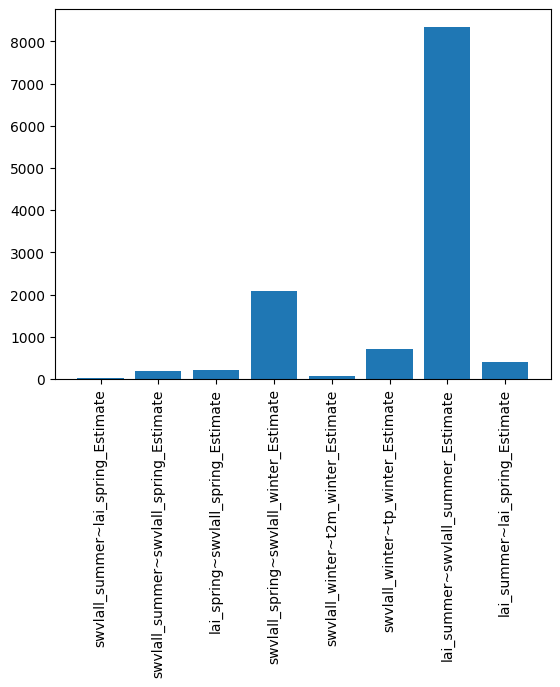

In [13]:
rank = 2
region = "Mediterranean"
fig, ax = plt.subplots(1,1)
ax.bar(stats[region][len(stats["var_list"])-rank][0], stats[region][len(stats["var_list"])-rank][1])
ax.set_xticks(np.arange(len(stats["var_list"])))
ax.set_xticklabels(stats["var_list"])
plt.xticks(rotation = 90)
# plt.title()

/tmp/ipykernel_161645/548795513.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(4,2, figsize = (8,14))


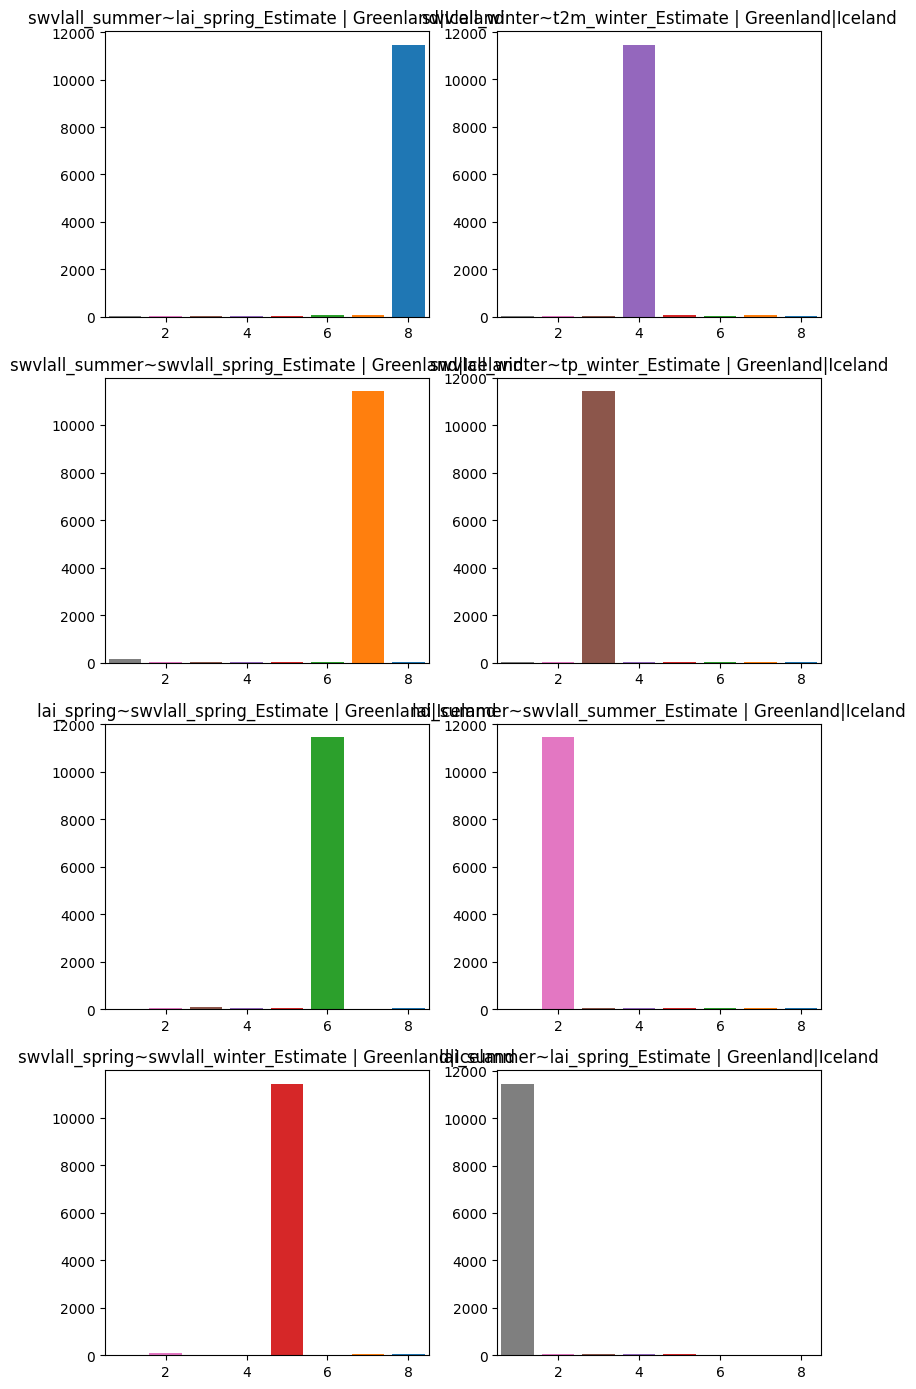

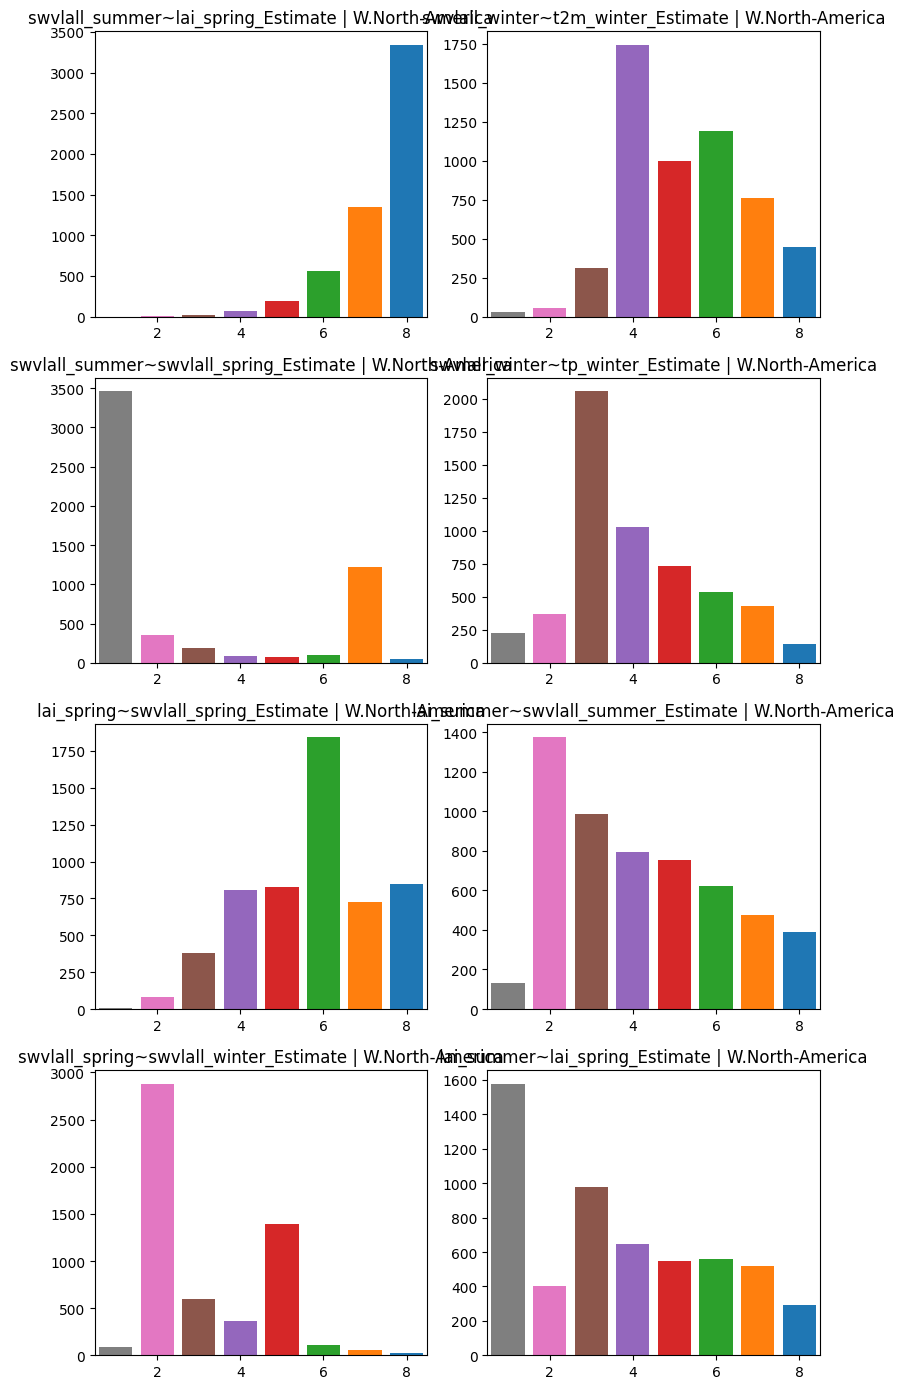

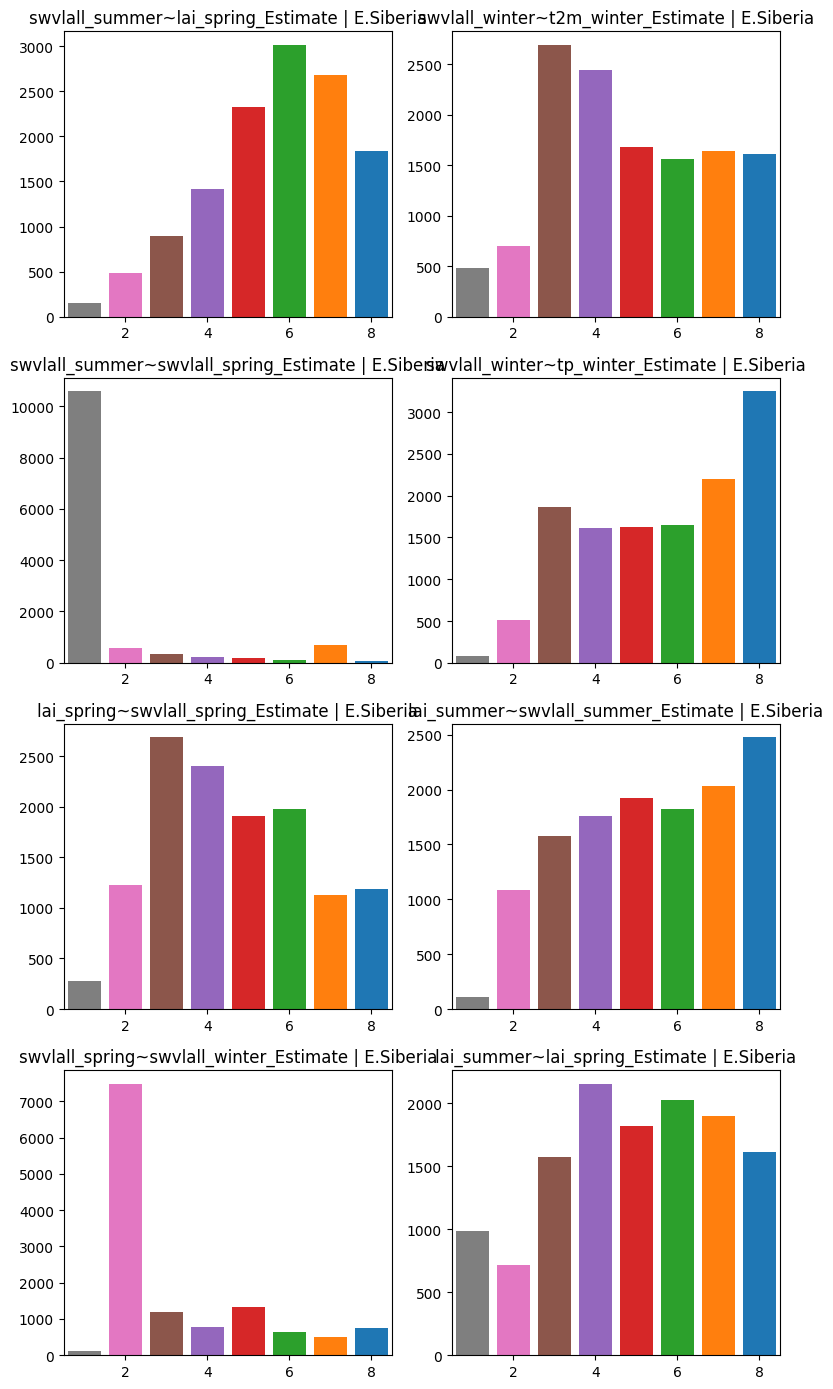

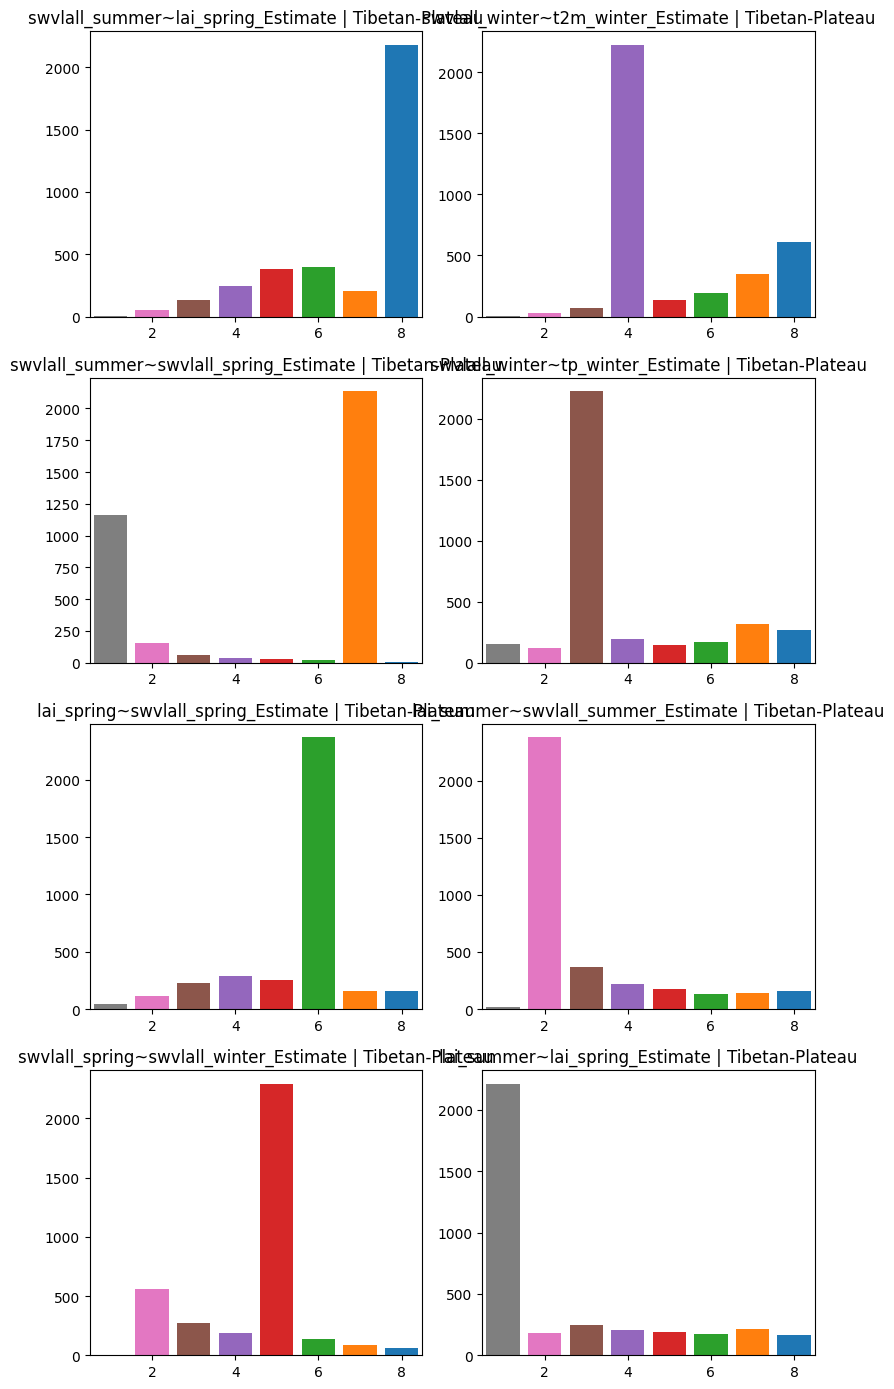

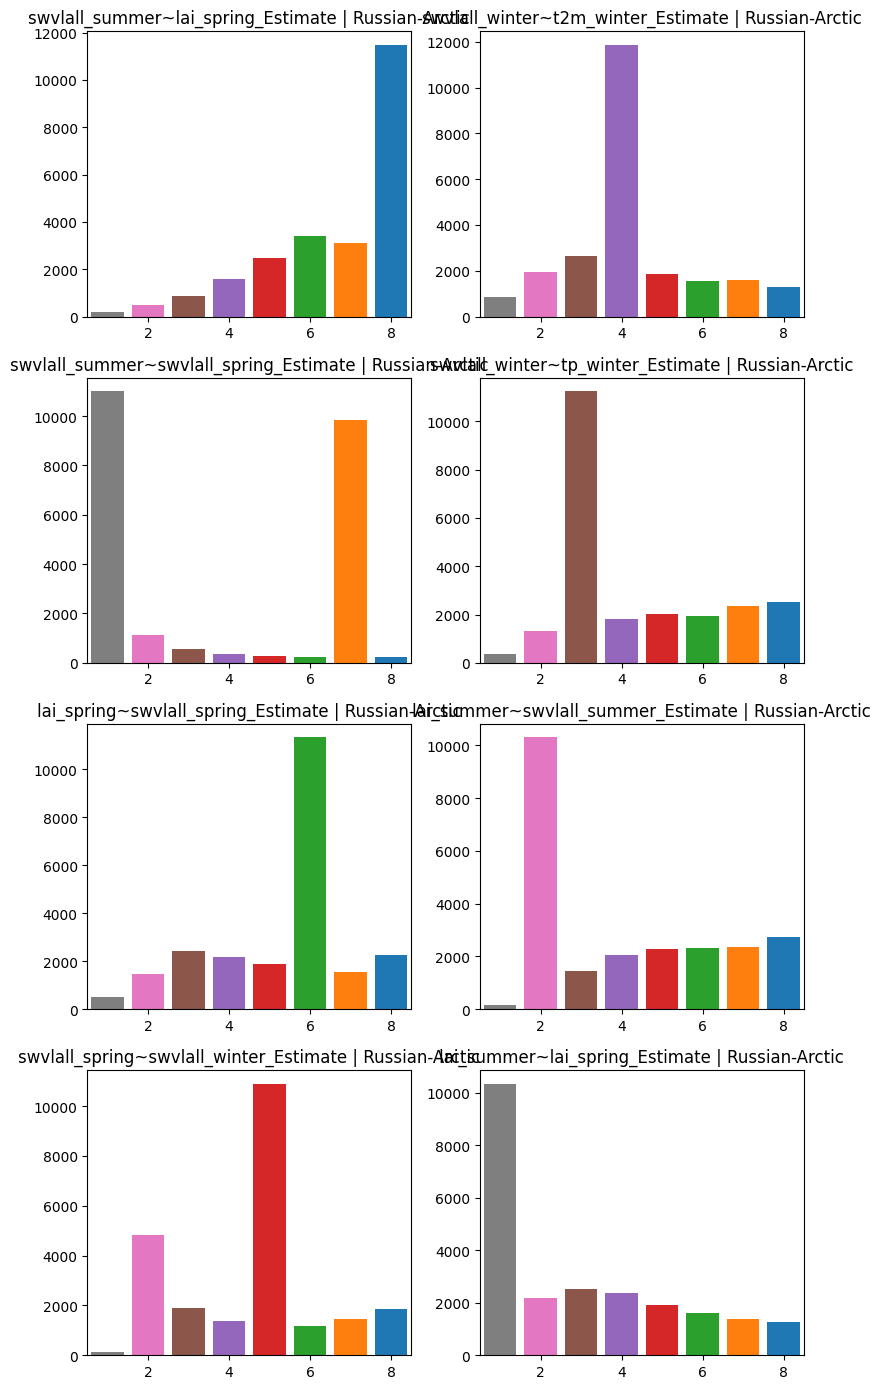

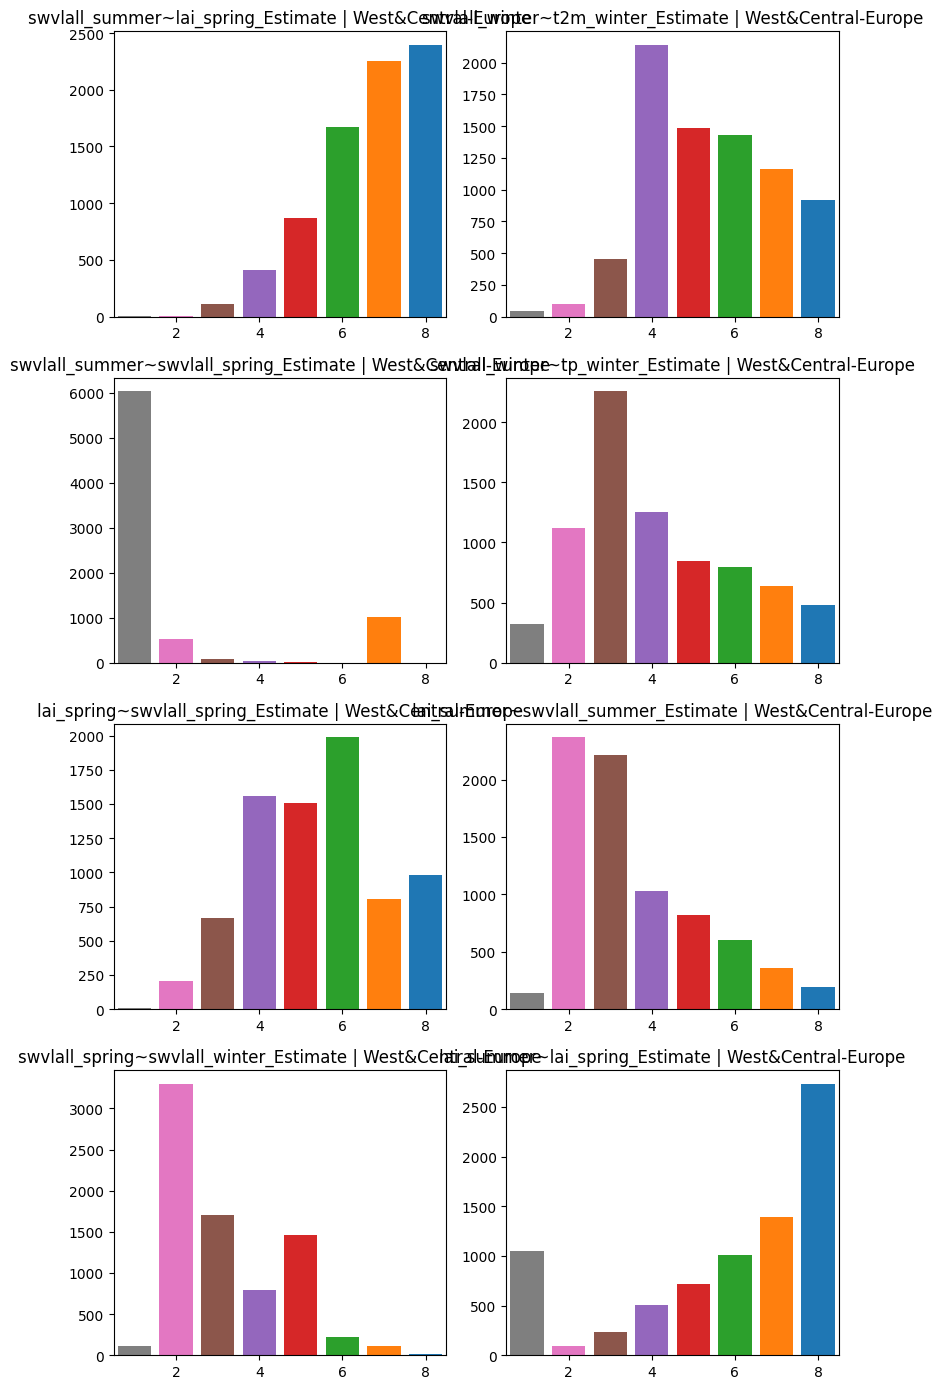

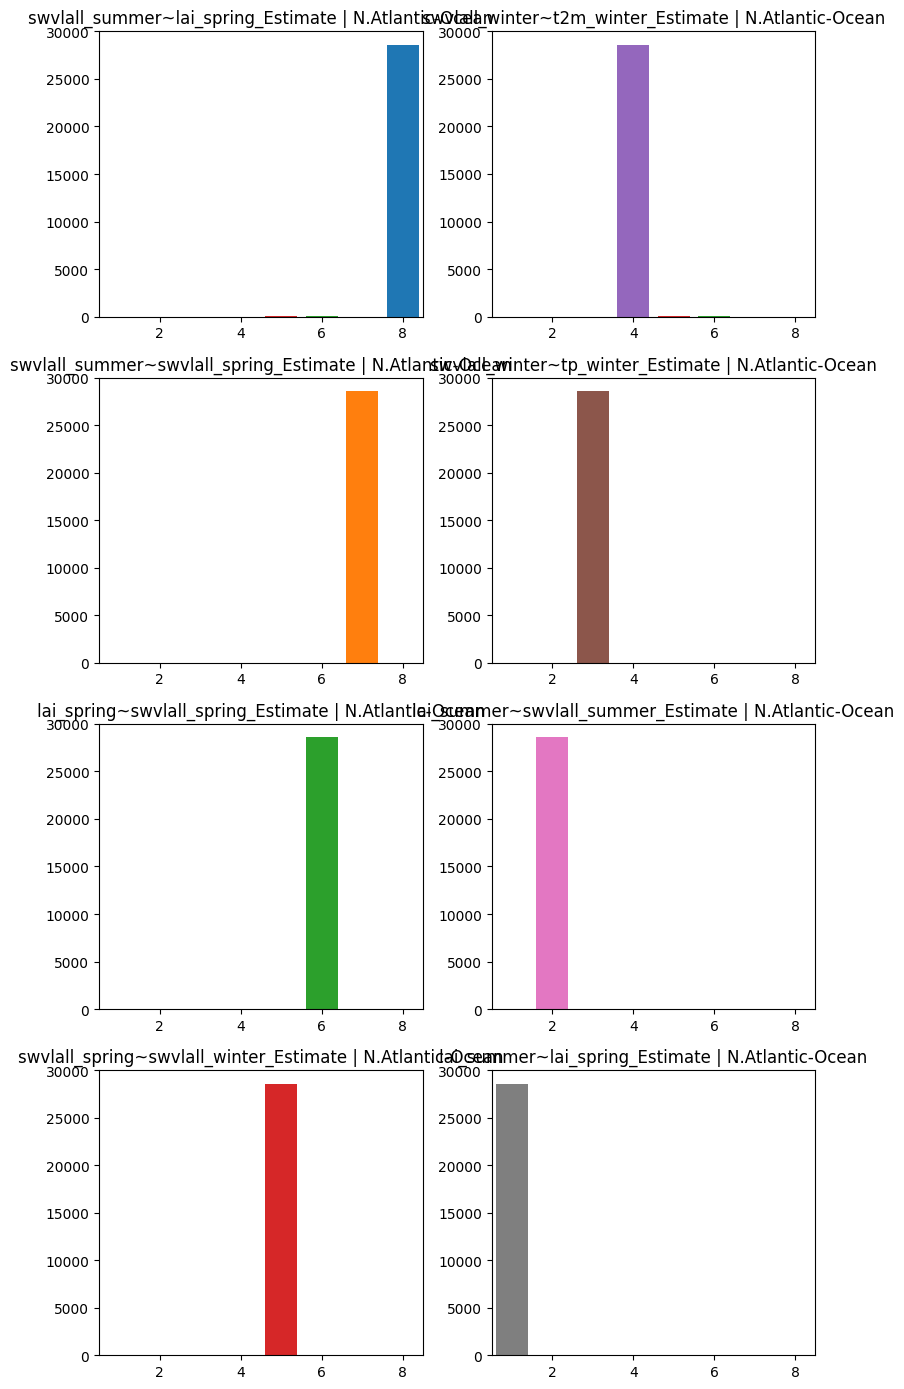

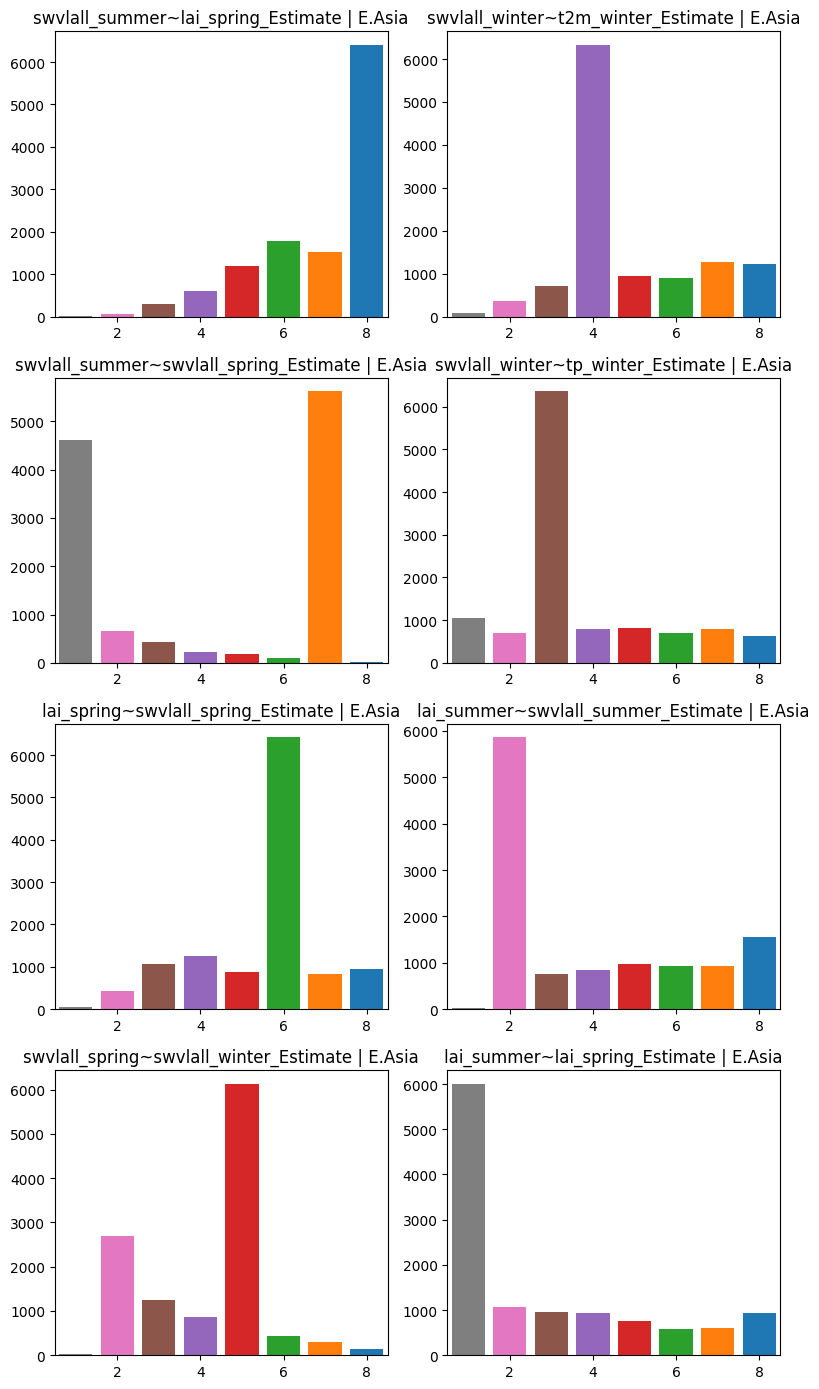

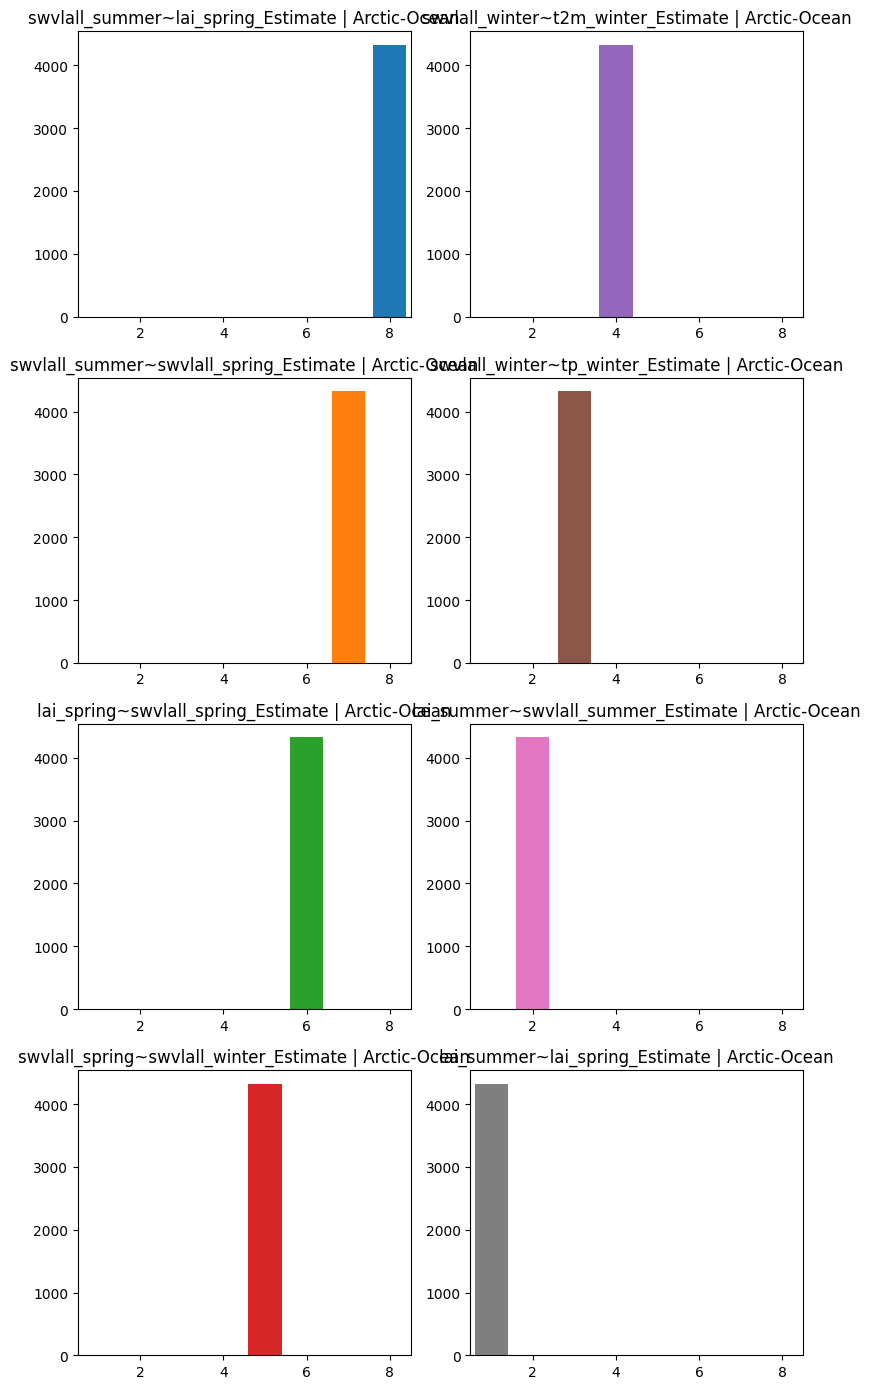

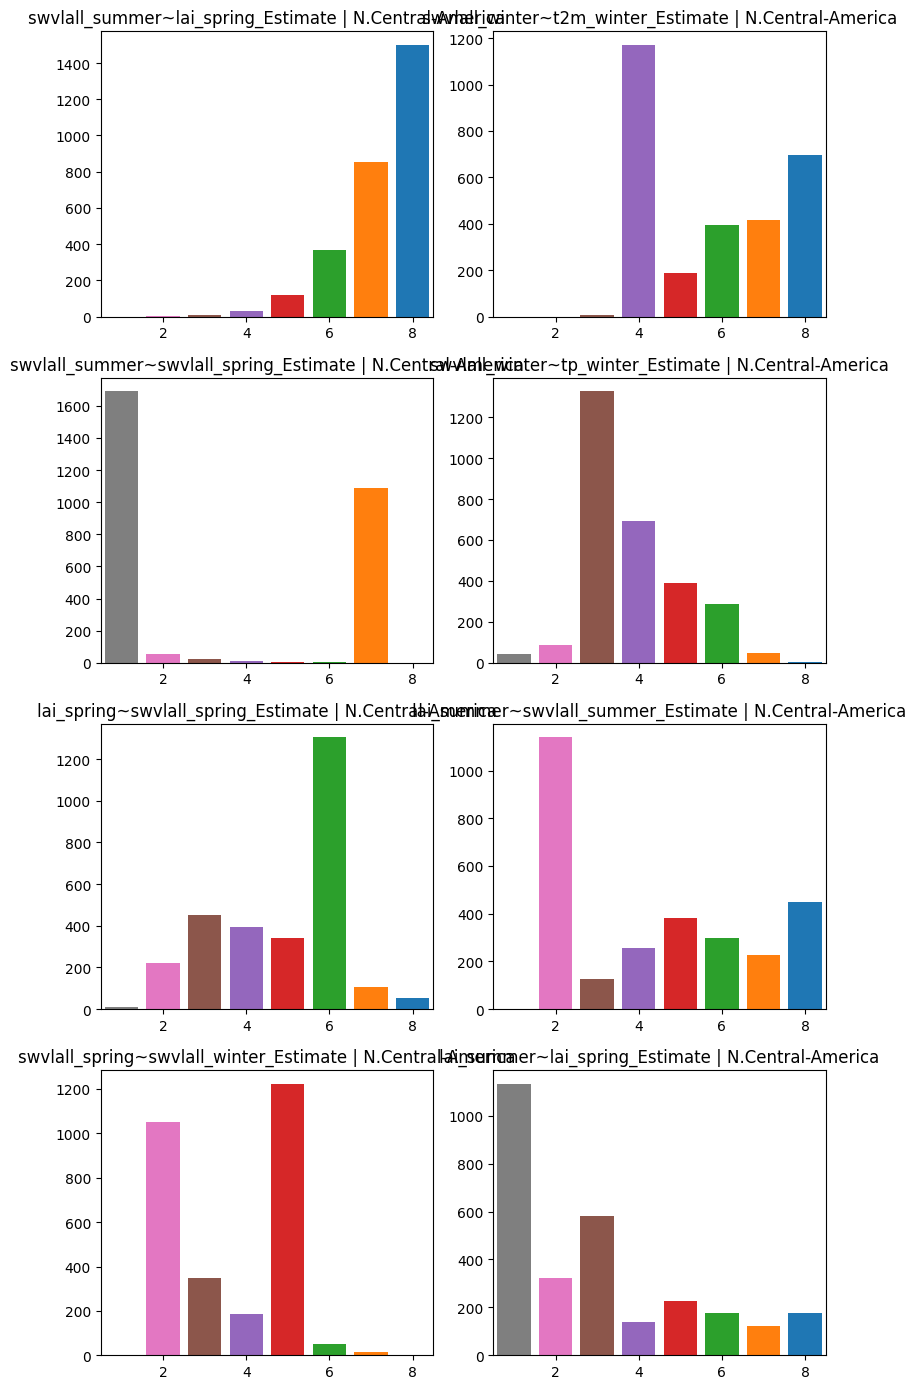

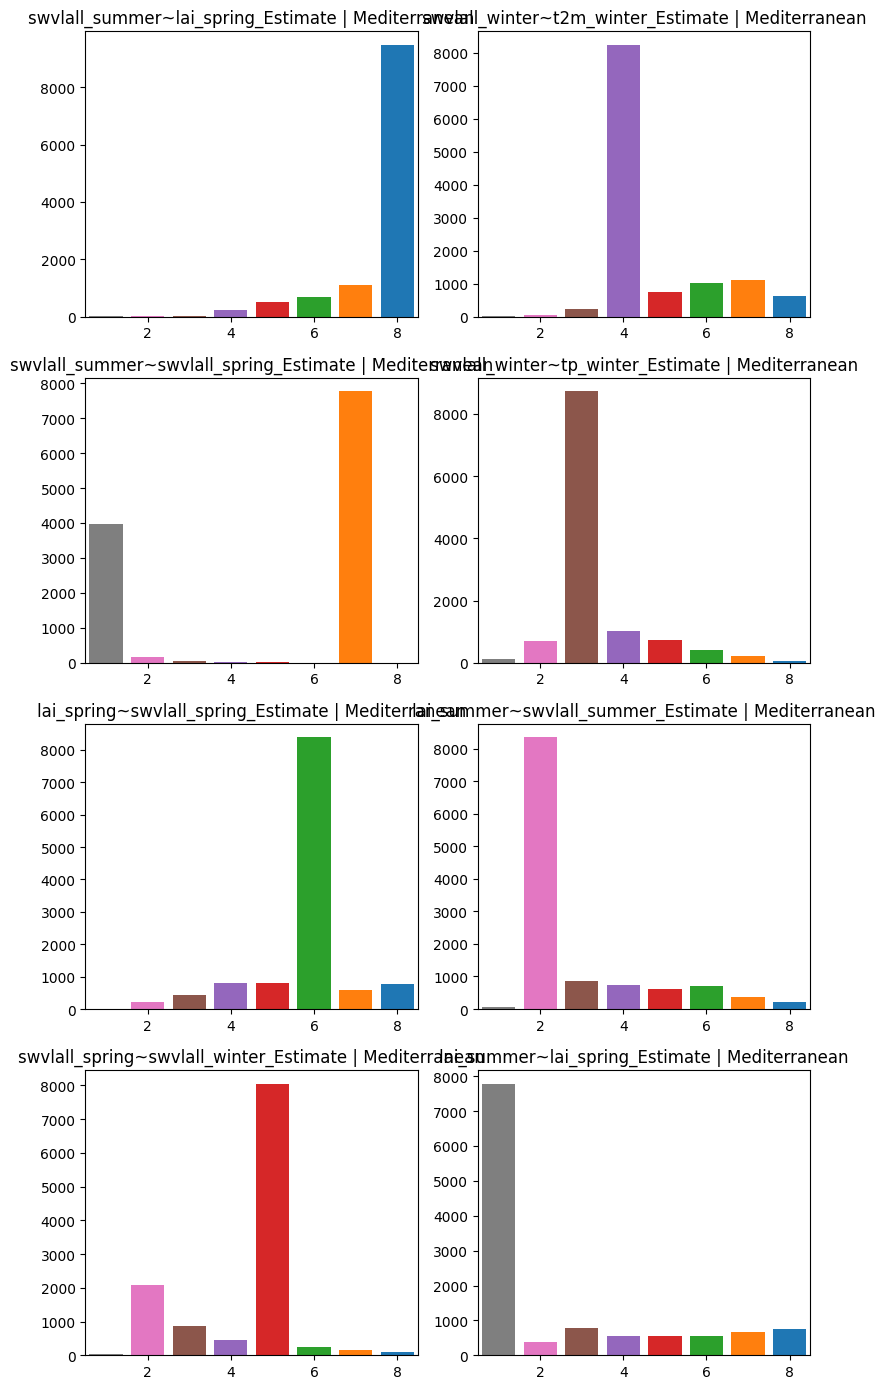

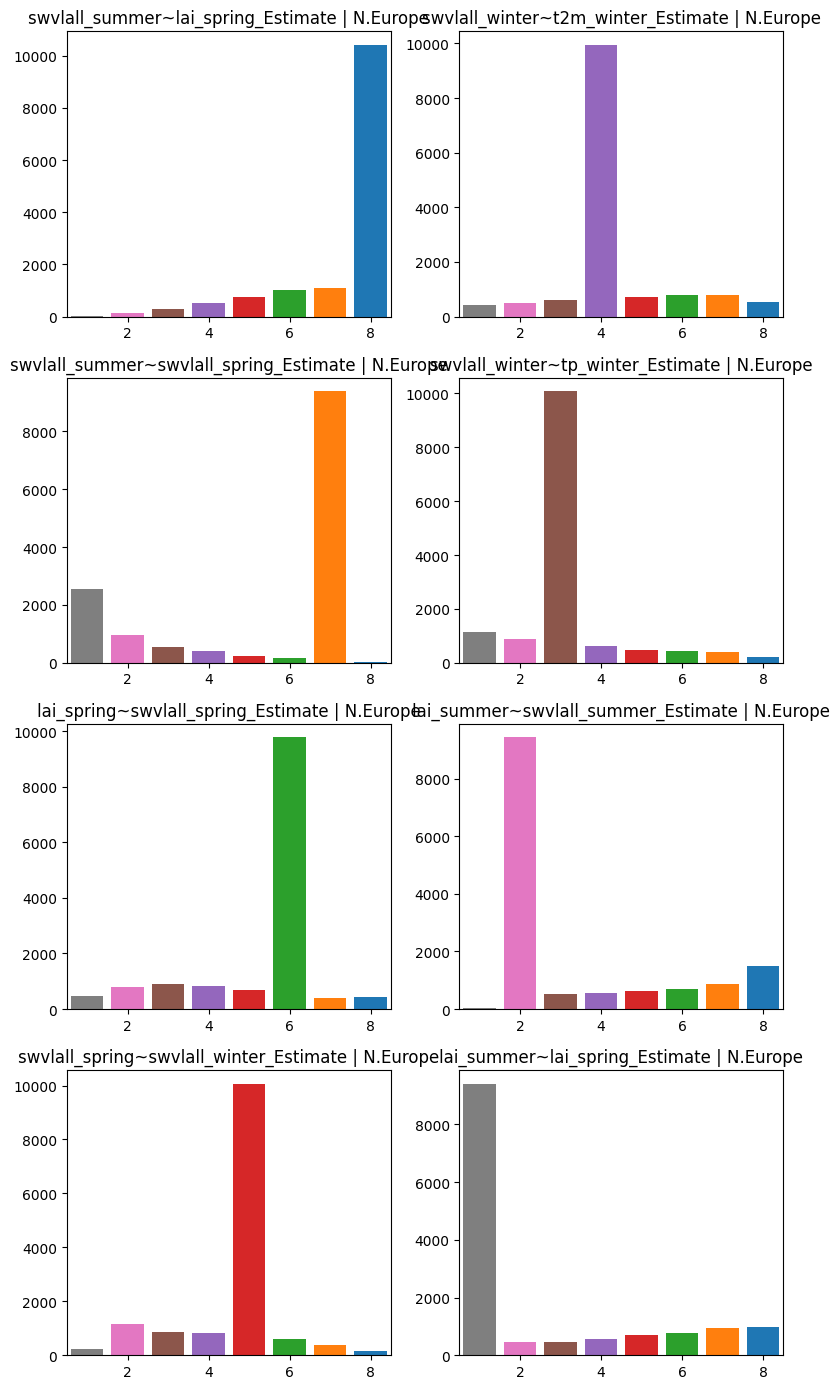

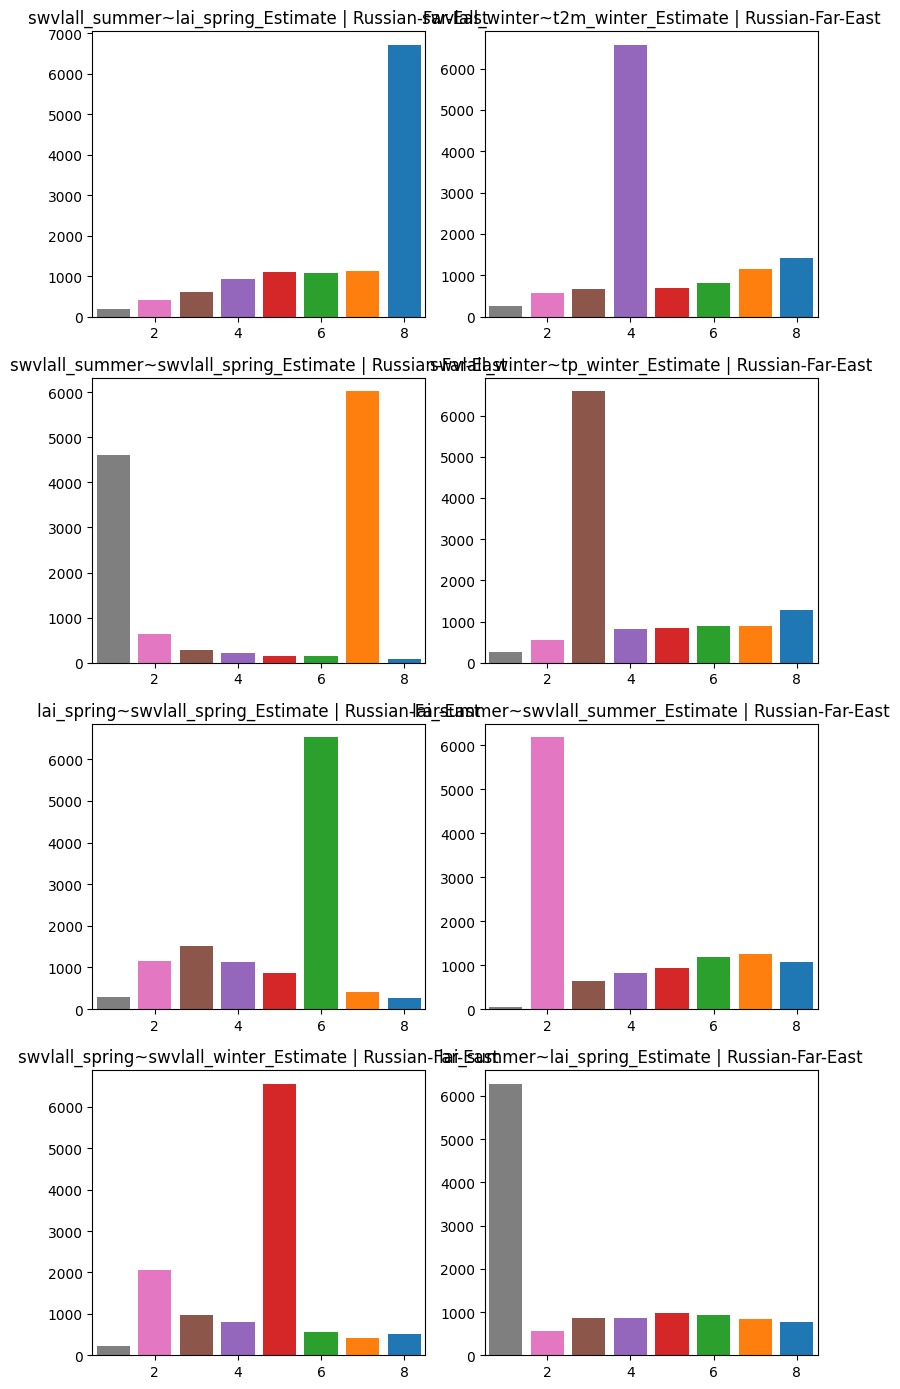

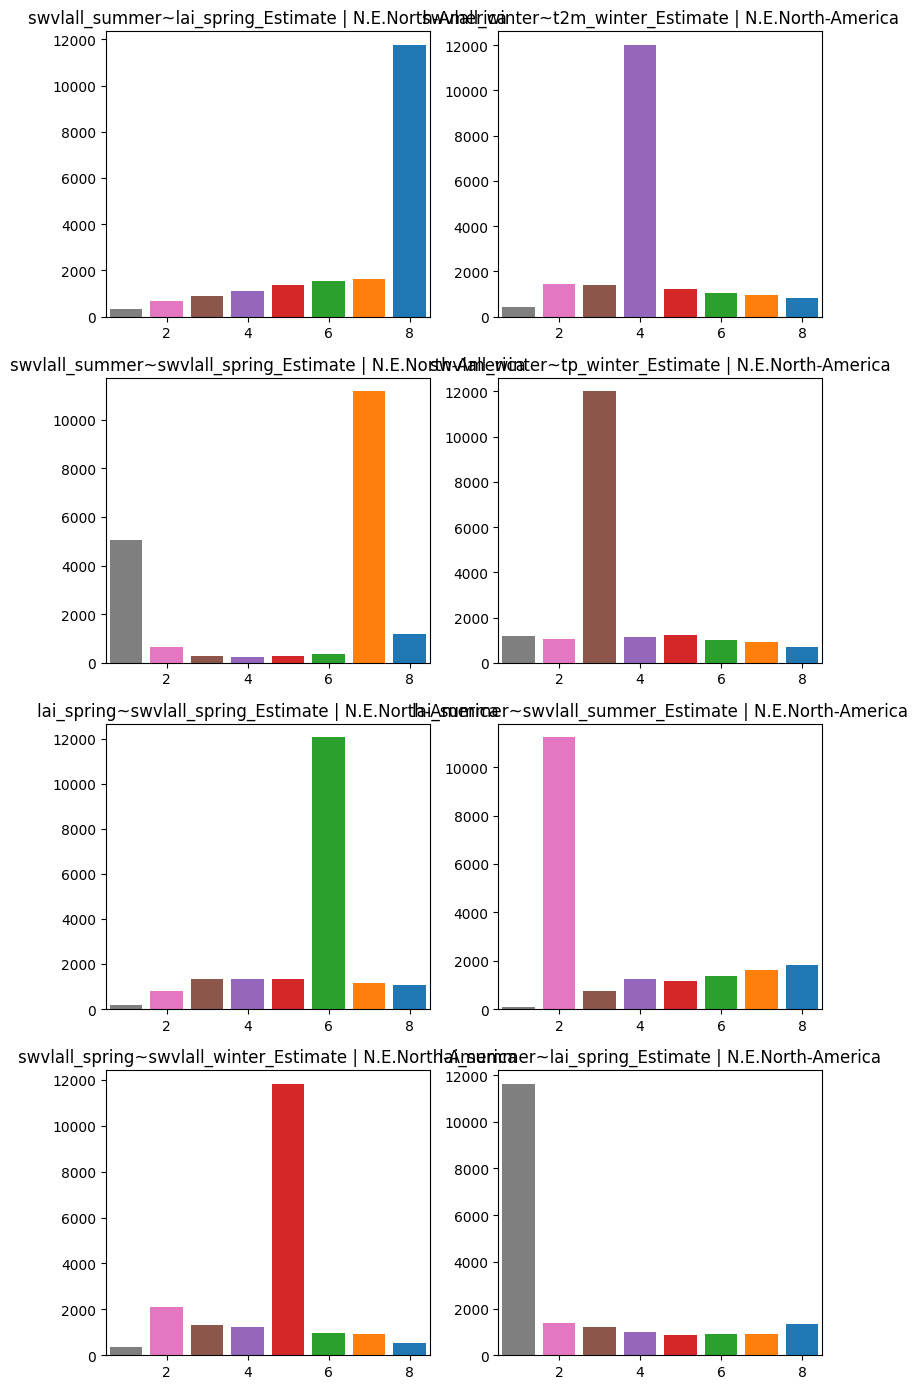

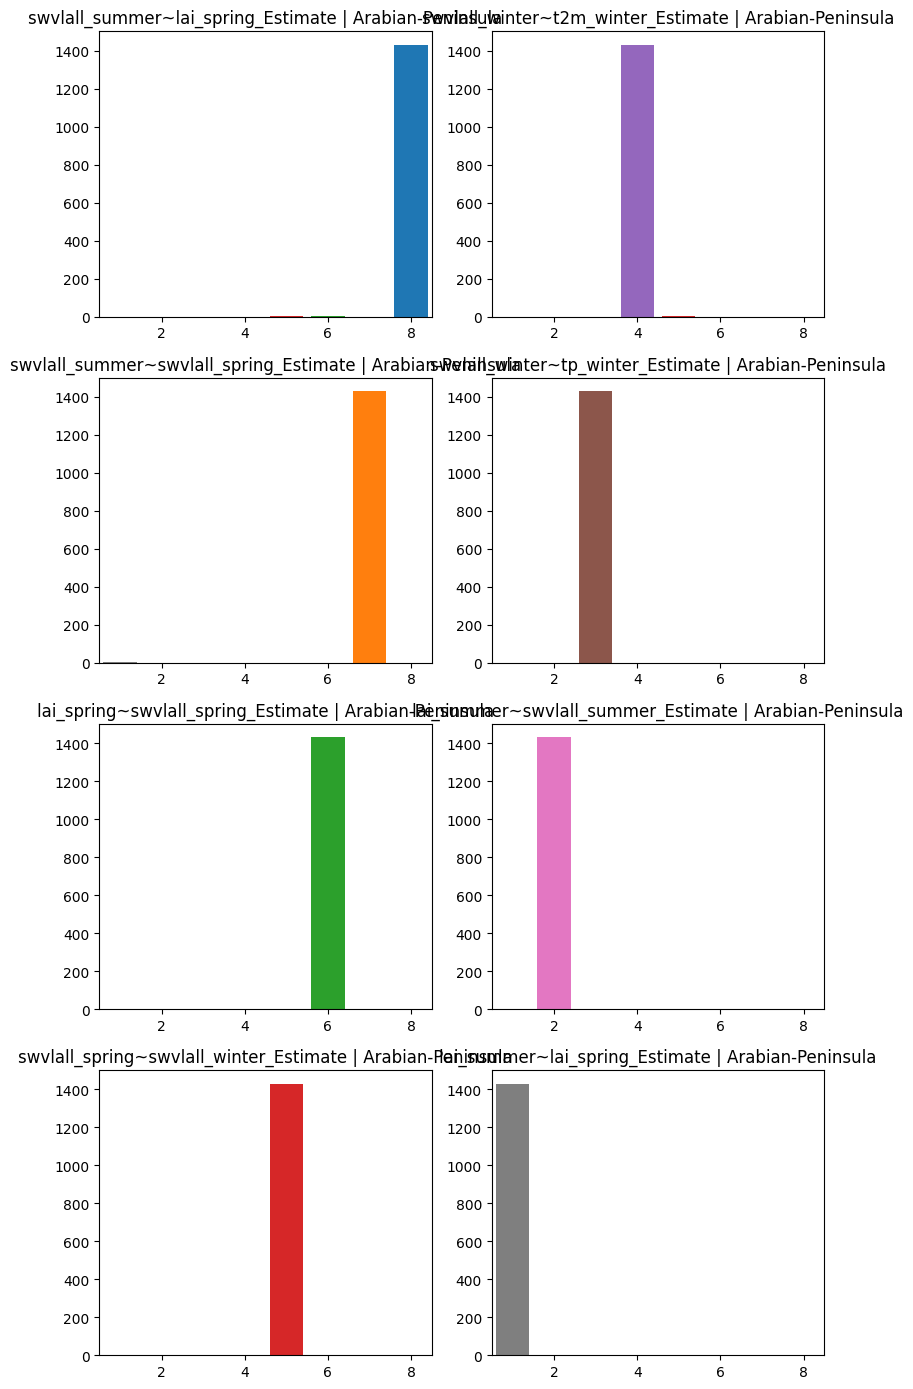

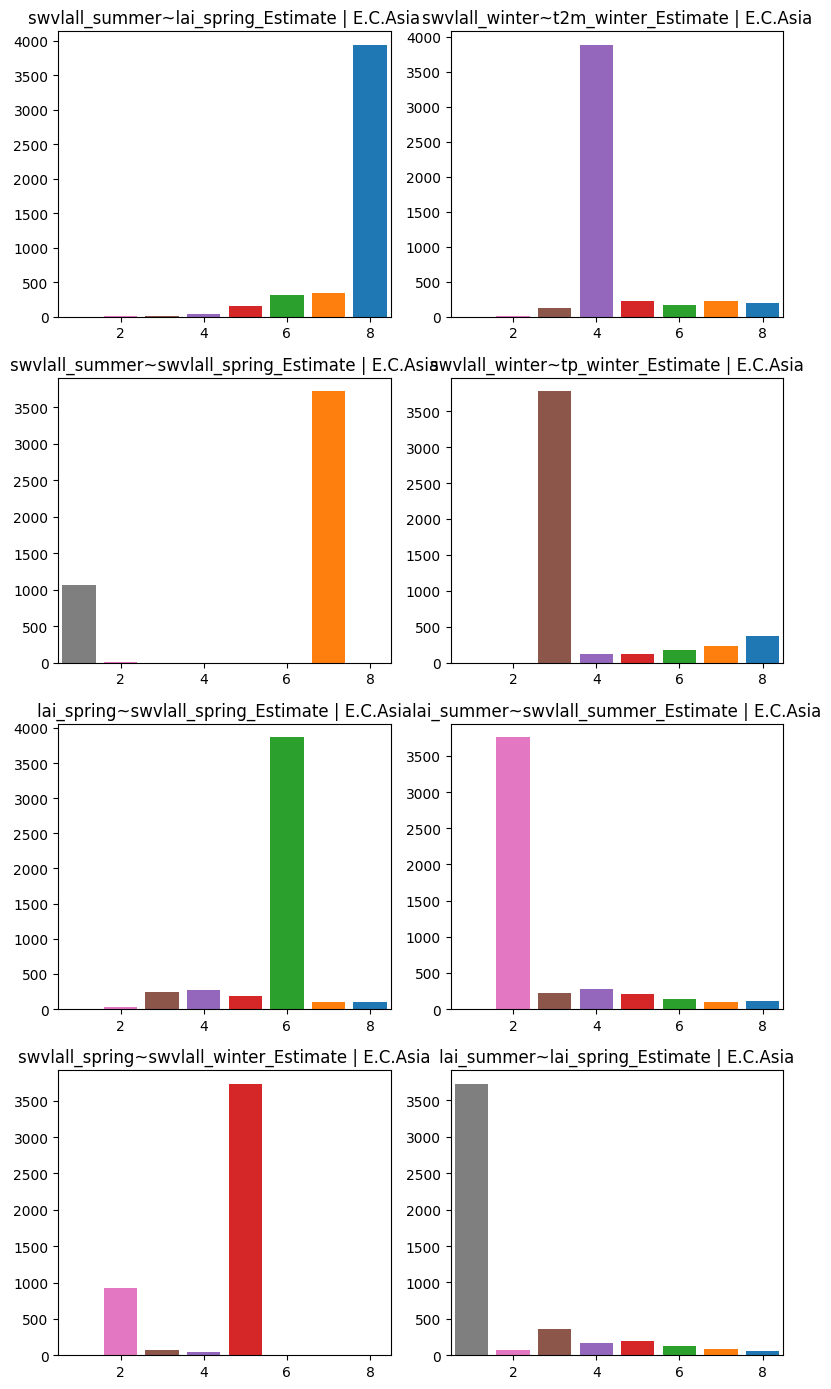

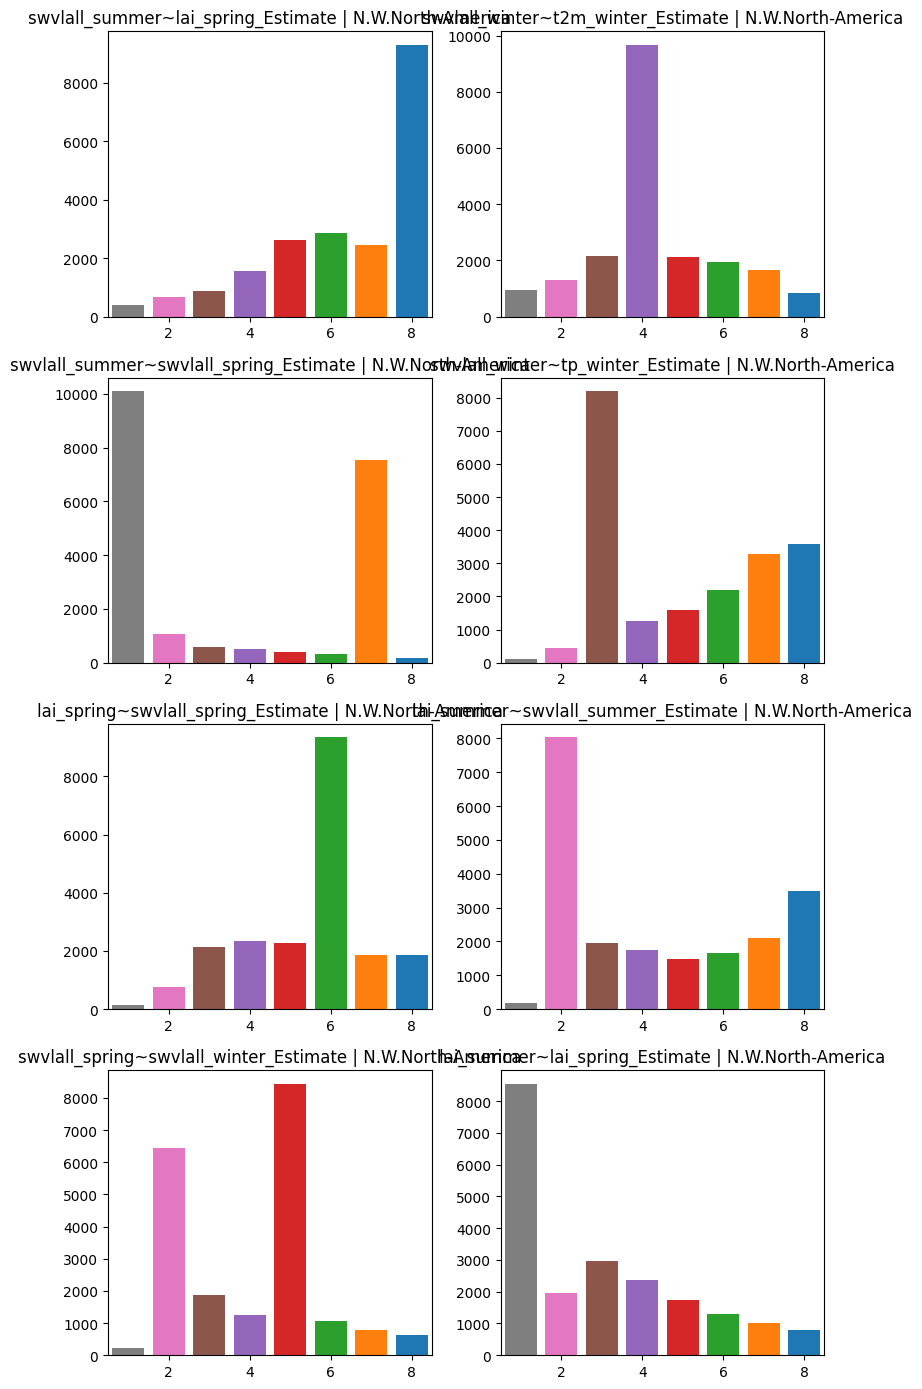

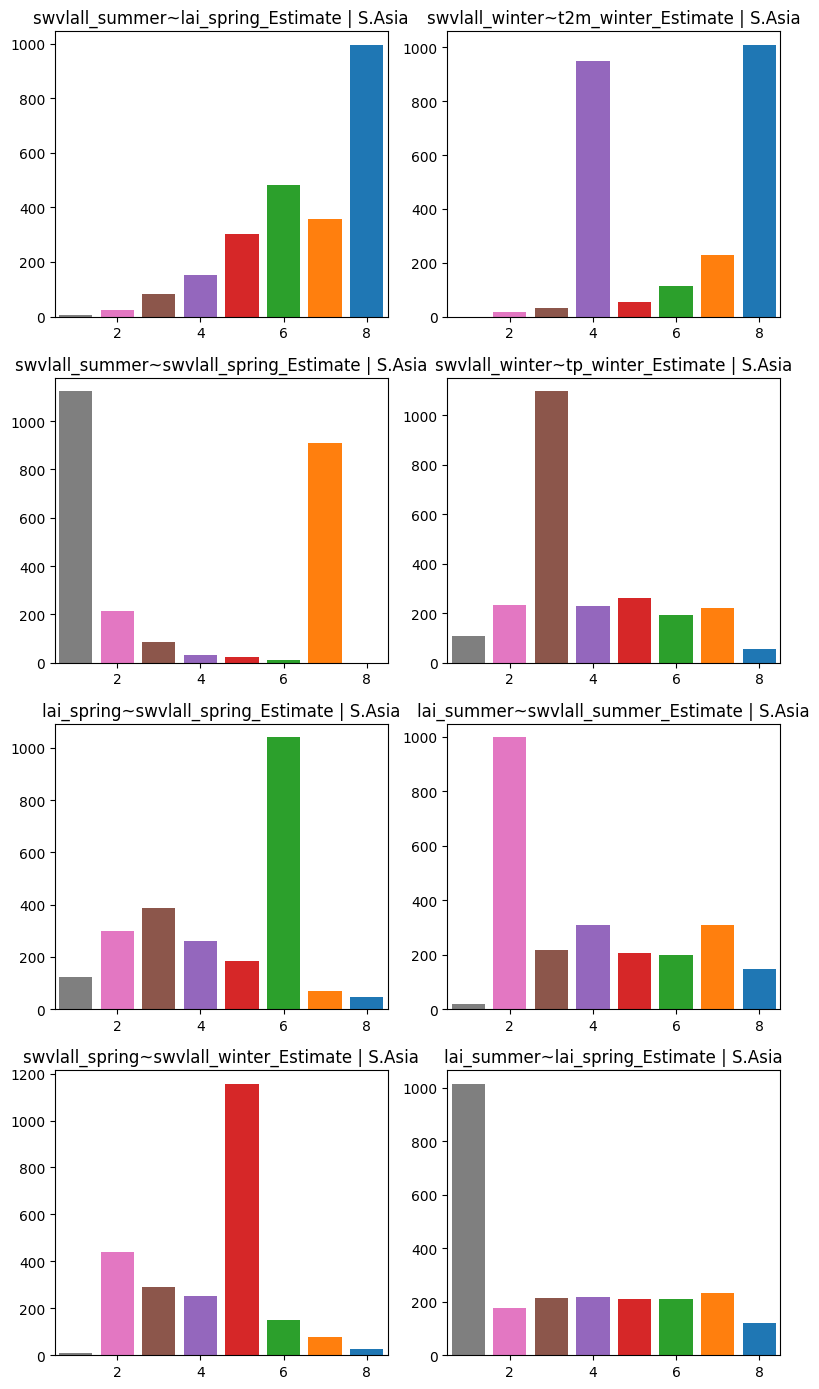

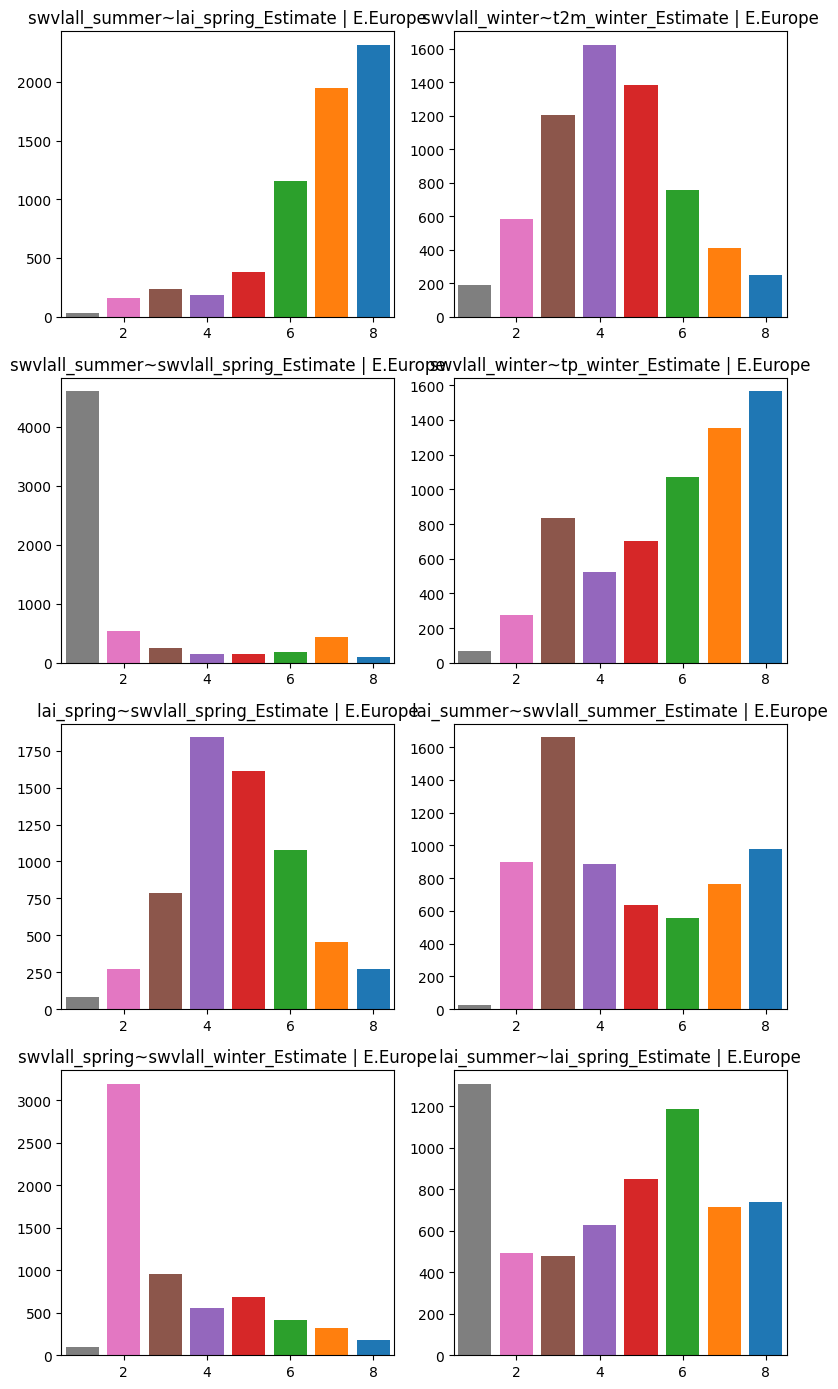

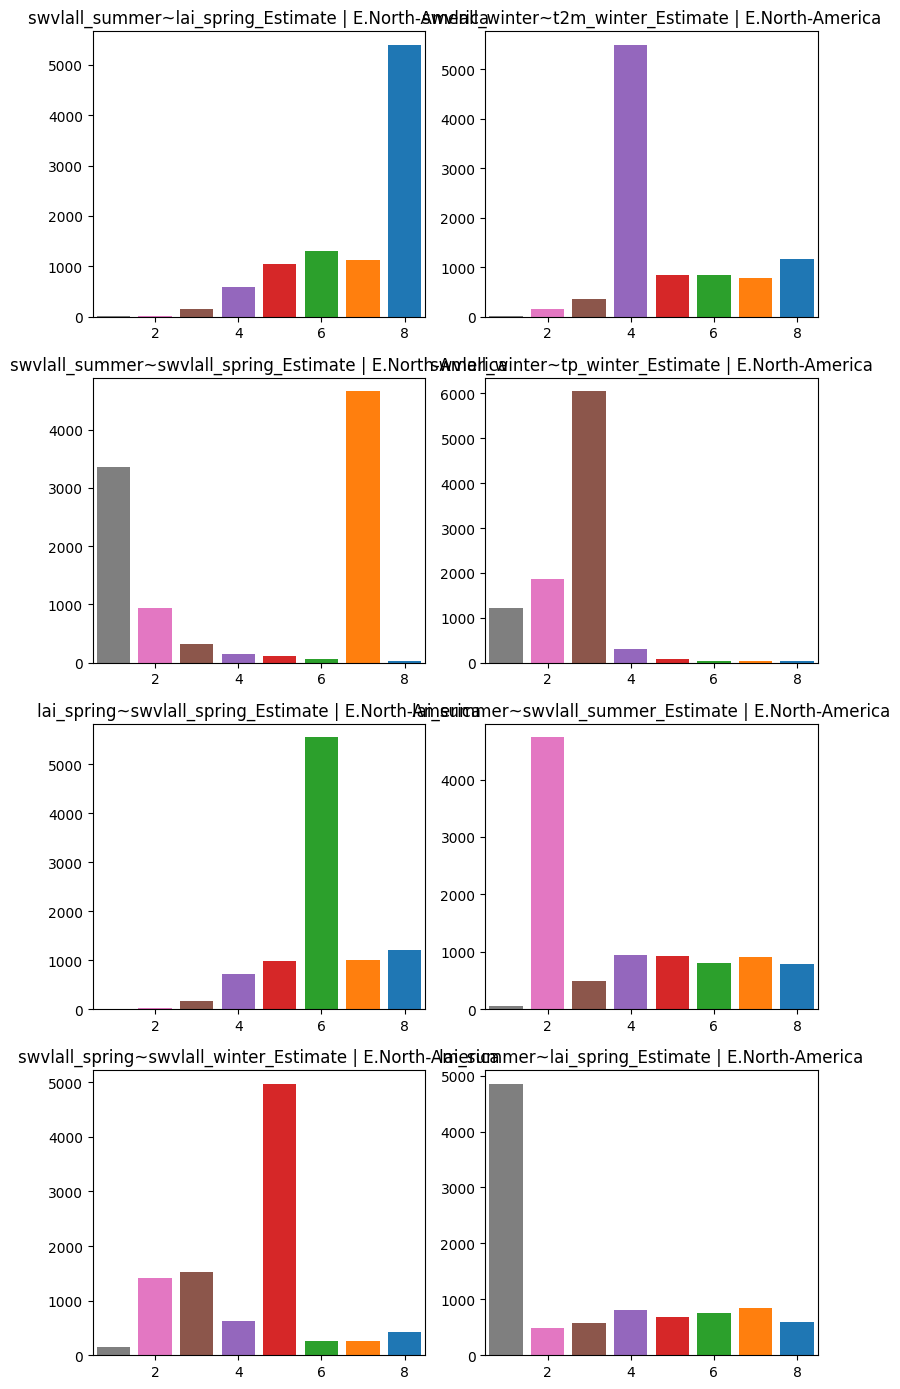

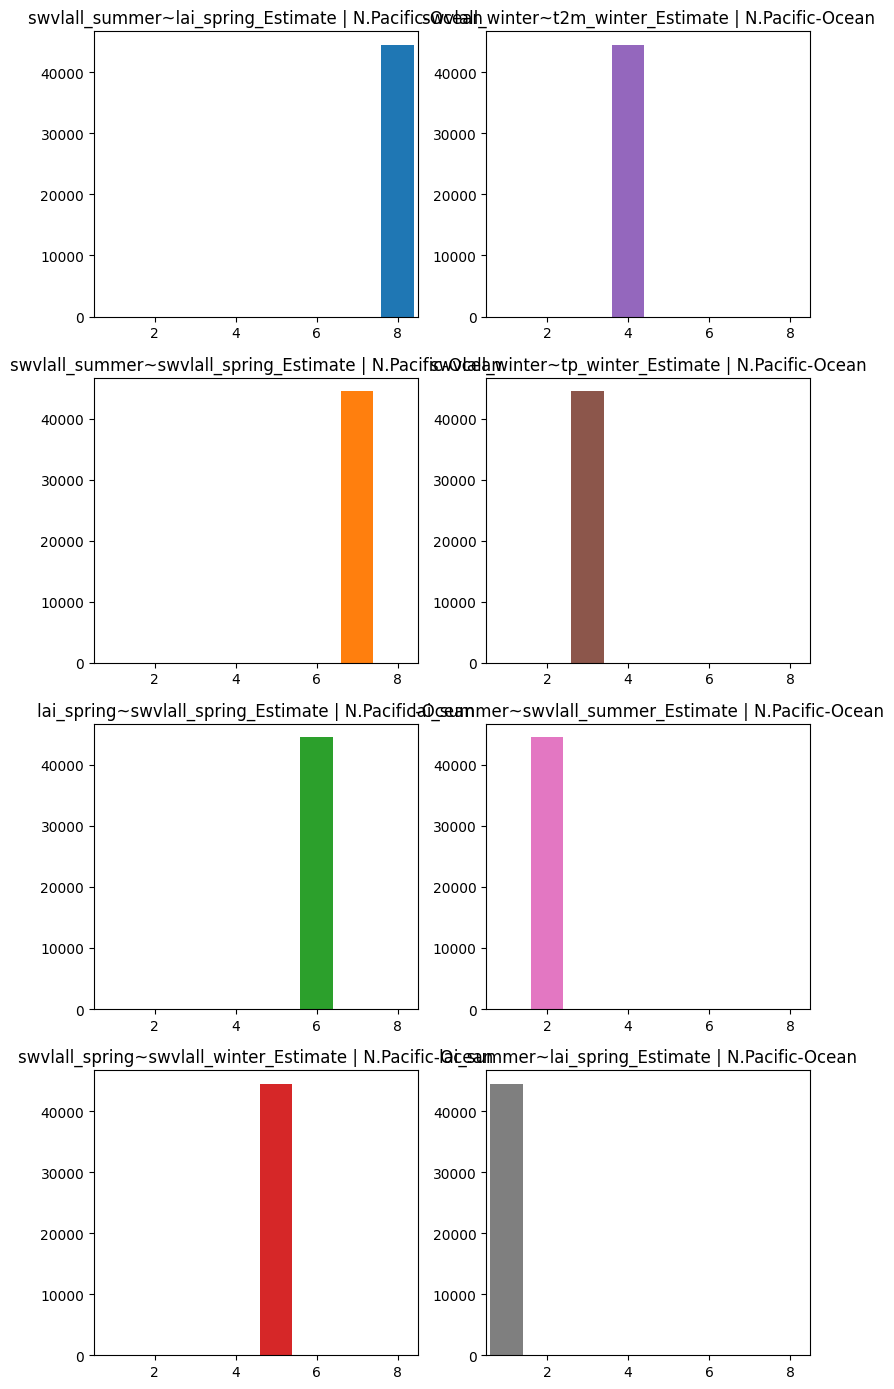

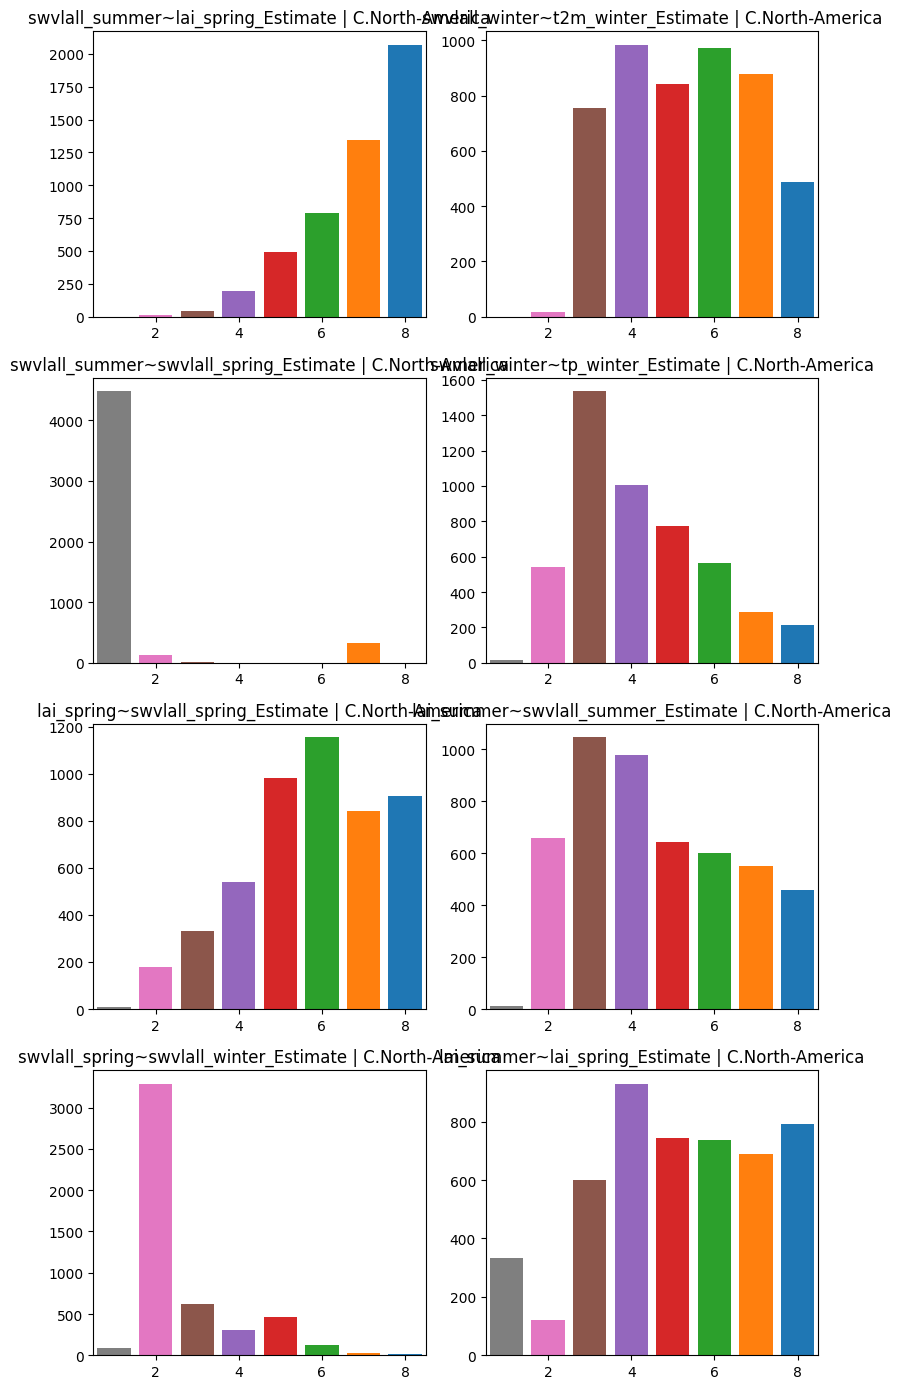

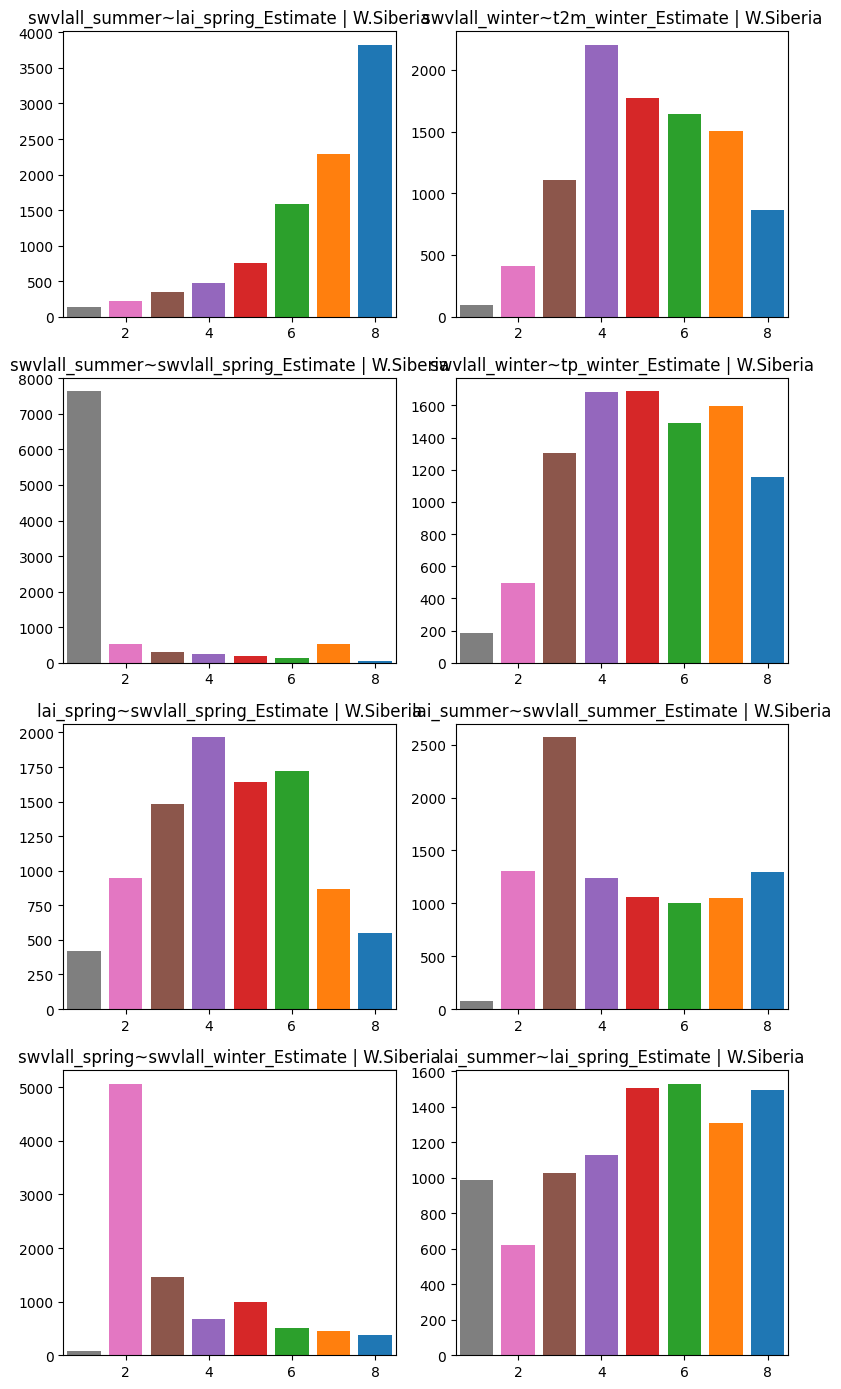

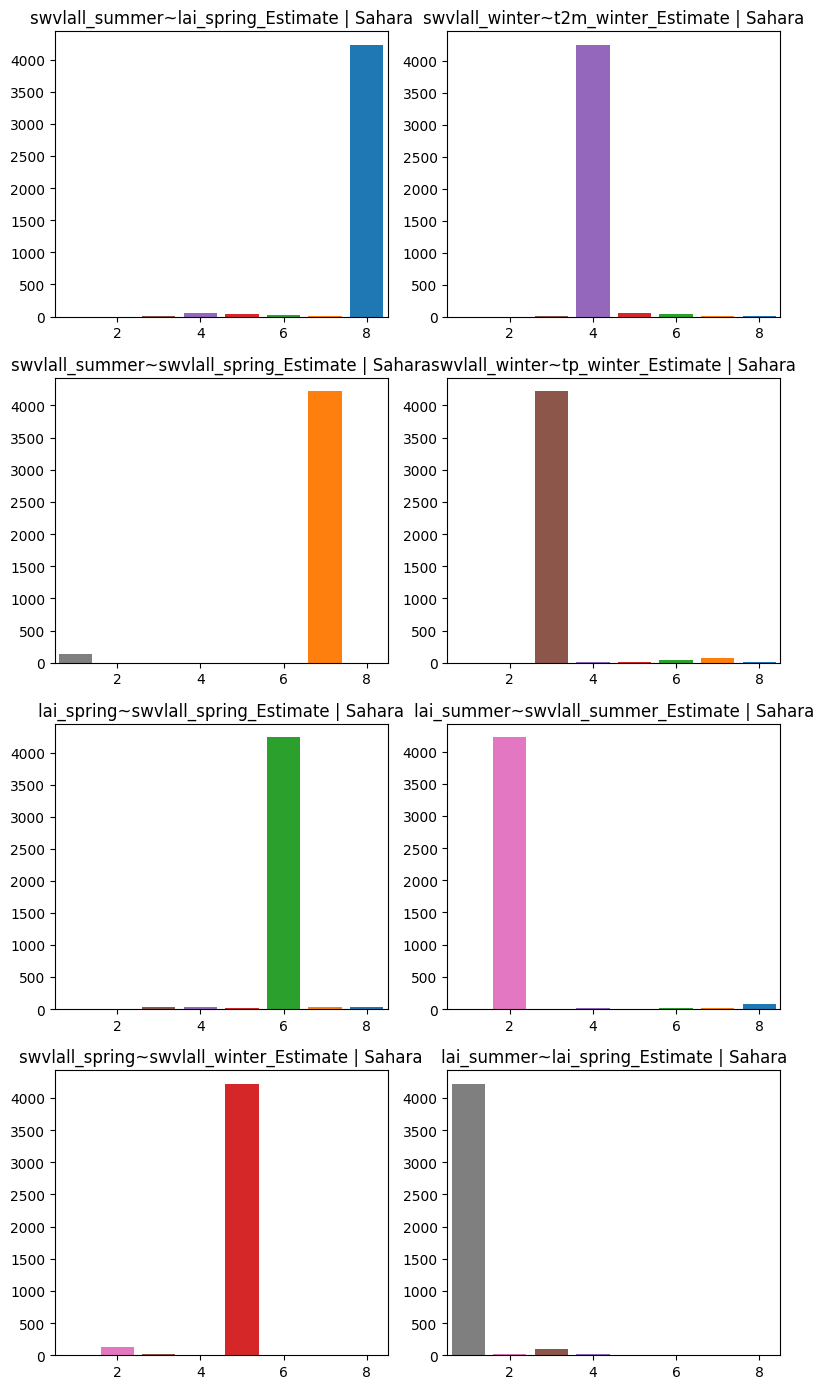

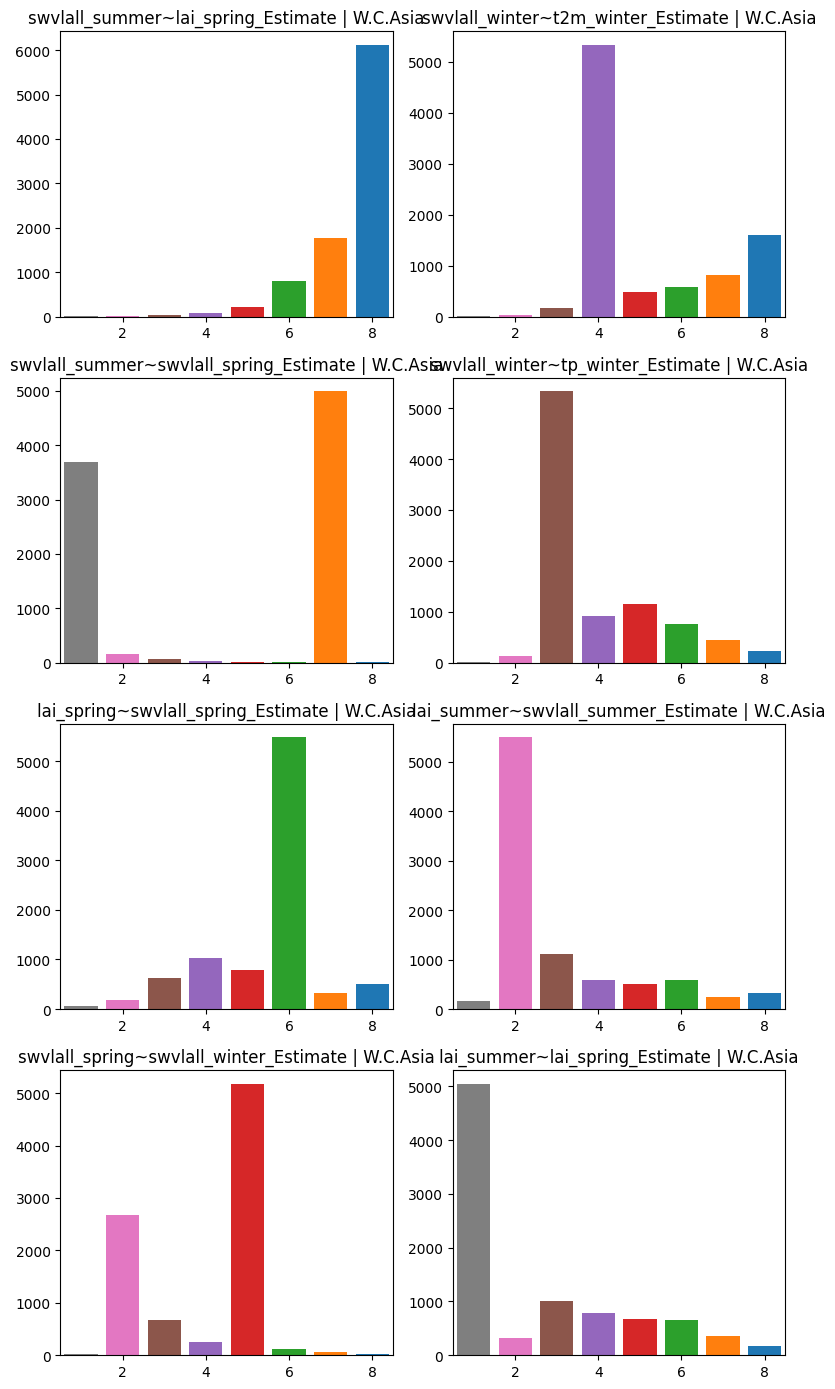

In [20]:
region_list = [key for key, val in stats.items() if key!= "var_list"]

for region in region_list:
    fig, axes = plt.subplots(4,2, figsize = (12,14))
    # region = "Mediterranean"
    for i, variable in enumerate(range(len(stats["var_list"]))):
        link_name = stats["var_list"][variable]
        for rank in range(len(stats["var_list"])):
            index = np.where(stats[region][rank][0]==variable)
            axes[i%4][i//4].bar(8-rank, stats[region][rank][1][index])

            axes[i%4][i//4].set_title(f"{link_name} | {region}")
            axes[i%4][i//4].set_xlim(0.5,8.5)
    plt.tight_layout()
    plt.savefig(f"images/{region}_ranking.png")

In [10]:
stats[region]

{0: (array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        dtype=float32),
  array([8233,  172,  183,  409,  497,  488,   48,  216,   14,  141,  476,
          691,  432])),
 1: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13.], dtype=float32),
  array([ 565, 7771,  309,  367,  297,  399,  428,   32,  303,   65,   85,
          277,  637,  465])),
 2: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13.], dtype=float32),
  array([ 618,    3, 8178,  537,  245,  371,  364,   39,  309,   93,   81,
          212,  520,  430])),
 3: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13.], dtype=float32),
  array([ 636,    4,  433, 8422,  210,  349,  425,   58,  310,   64,   95,
          214,  412,  368])),
 4: (array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
         13.], dtype=float32),
  array([ 496,    3,  659,  586, 7971,  326,  351,  